In [5]:
# Librerías
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from model_helpers import eval_perform_multi_class
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [6]:
data_path = "./data/df_2_cod.csv"
df_original = pd.read_csv(data_path)
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   game_id                20058 non-null  int64 
 1   turns                  20058 non-null  int64 
 2   white_rating           20058 non-null  int64 
 3   black_rating           20058 non-null  int64 
 4   moves                  20058 non-null  object
 5   opening_moves          20058 non-null  int64 
 6   ctrld_pawn             20058 non-null  int64 
 7   ctrld_knight           20058 non-null  int64 
 8   ctrld_bishop           20058 non-null  int64 
 9   ctrld_rook             20058 non-null  int64 
 10  ctrld_queen            20058 non-null  int64 
 11  ctrld_king             20058 non-null  int64 
 12  preassure_points       20058 non-null  int64 
 13  controlled_diagonals   20058 non-null  int64 
 14  controlled_lines       20058 non-null  int64 
 15  rated_cod          

# Df original codificado y sin user_id White_id, Black_id y Opening_response (Variables no relevantes o con muchos valores nulos). 

In [7]:
df = df_original.copy()
y_name = "winner_cod"
# X es el dataframe eliminando la variable de salida
X = df.drop(columns=[y_name, 'game_id', 'white_rating', 'black_rating', 'moves', 'current_turn_cod', 'opening_moves', 'rated_cod', 'current_turn_cod', 'time_increment_cod', 'opening_code_cod', 'opening_fullname_cod', 'opening_shortname_cod', 'opening_variation_cod', 'moves_fen_cod'])
# Y es un array unidimensional (ravel) de la variable de salida
Y = df[y_name].ravel()
Y

array([2, 0, 2, ..., 2, 2, 0], dtype=int64)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.3)
X_train.columns

Index(['turns', 'ctrld_pawn', 'ctrld_knight', 'ctrld_bishop', 'ctrld_rook',
       'ctrld_queen', 'ctrld_king', 'preassure_points', 'controlled_diagonals',
       'controlled_lines'],
      dtype='object')

# Maquina de soporte vectorial

In [9]:
# Crear un clasificador SVM para clasificación con kernel lineal, polinomial y de funcion de base radial
mod_linear = svm.SVC(kernel='linear',C=1, probability=True)
mod_poly = svm.SVC(kernel='poly',degree=2,C=1, probability=True)
mod_rbf = svm.SVC(kernel='rbf',C=1,gamma='auto', probability=True)

In [10]:
# Entrenar el clasificador con los datos de entrenamiento
mod_linear.fit(X_train, Y_train)

SVC(C=1, kernel='linear', probability=True)

In [11]:
mod_poly.fit(X_train, Y_train)

SVC(C=1, degree=2, kernel='poly', probability=True)

In [12]:
mod_rbf.fit(X_train, Y_train)

SVC(C=1, gamma='auto', probability=True)


Performance del modelo de Prueba SVM kernel lineal datos originales
 Accu 0.4988368228647391 
 Prec 0.24883817584578713 
 Reca 0.4988368228647391 
 Matriz de confusión:
 [[   0    0 2717]
 [   0    0  299]
 [   0    0 3002]]

Métricas de Probabilidad:
 Brier Score: 0.18147658746099193 
 AUC 0.5262


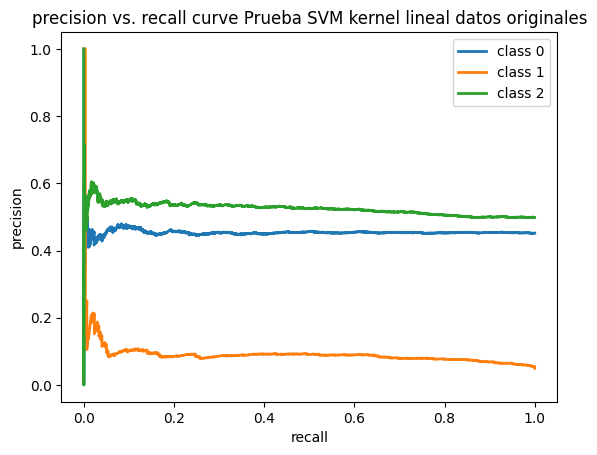

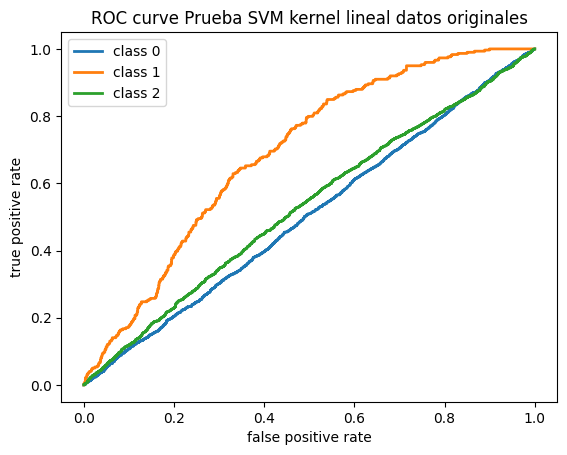


Performance del modelo de Entrenamiento SVM kernel lineal datos originales
 Accu 0.4985042735042735 
 Prec 0.2485065107020235 
 Reca 0.4985042735042735 
 Matriz de confusión:
 [[   0    0 6390]
 [   0    0  651]
 [   0    0 6999]]

Métricas de Probabilidad:
 Brier Score: 0.18051481532444383 
 AUC 0.5284


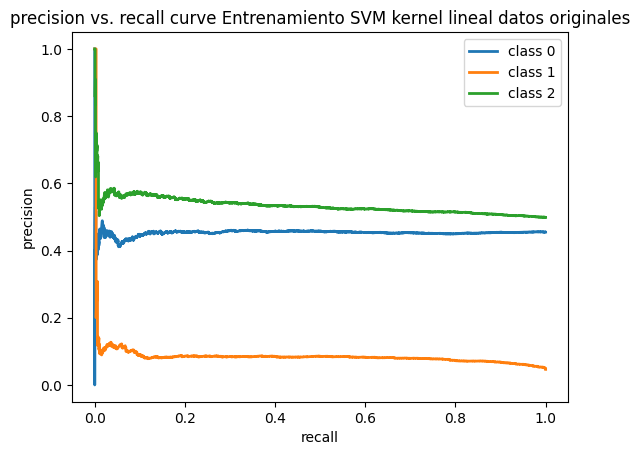

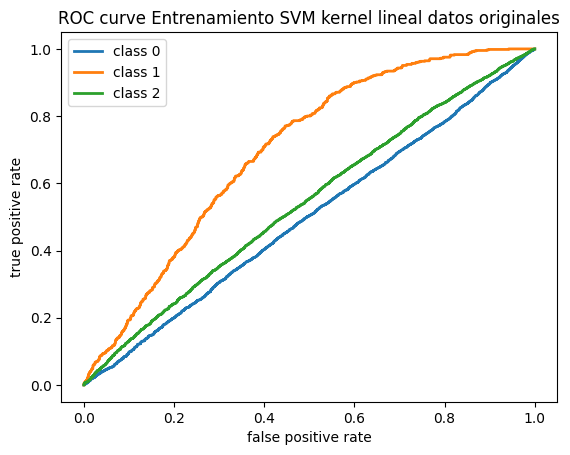

(0.4985042735042735,
 0.2485065107020235,
 0.4985042735042735,
 0.18051481532444383,
 0.5284066510239972,
 array([[   0,    0, 6390],
        [   0,    0,  651],
        [   0,    0, 6999]], dtype=int64))

In [13]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_linear_test = mod_linear.predict(X_test)
Yhat_linear_train = mod_linear.predict(X_train)
Yhat_linear_test_prob = mod_linear.predict_proba(X_test)
Yhat_linear_train_prob = mod_linear.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_linear_test,Yhat_linear_test_prob,3,"Prueba SVM kernel lineal datos originales")
eval_perform_multi_class(Y_train,Yhat_linear_train,Yhat_linear_train_prob,3, "Entrenamiento SVM kernel lineal datos originales")


Performance del modelo de Prueba SVM kernel polinomial datos originales
 Accu 0.49900299102691925 
 Prec 0.4362036017550198 
 Reca 0.49900299102691925 
 Matriz de confusión:
 [[ 137    0 2580]
 [  62    0  237]
 [ 136    0 2866]]

Métricas de Probabilidad:
 Brier Score: 0.1797371813213456 
 AUC 0.5438


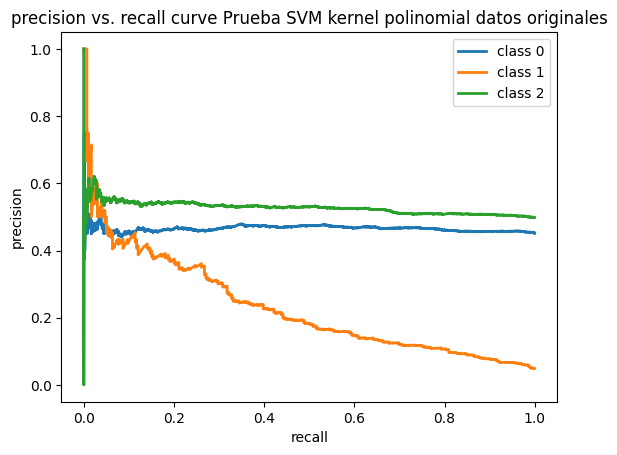

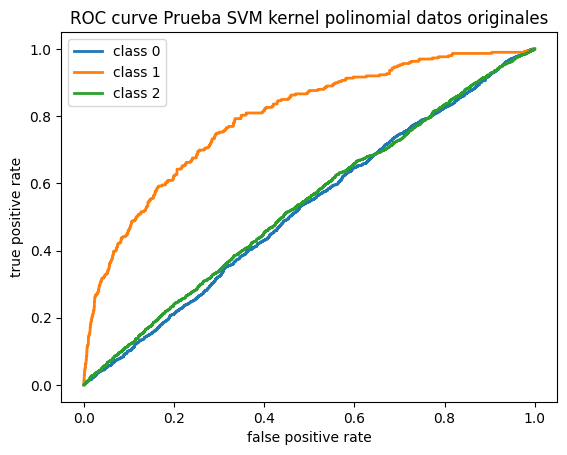


Performance del modelo de Entrenamiento SVM kernel polinomial datos originales
 Accu 0.502920227920228 
 Prec 0.4572415704714862 
 Reca 0.502920227920228 
 Matriz de confusión:
 [[ 333    0 6057]
 [ 135    0  516]
 [ 271    0 6728]]

Métricas de Probabilidad:
 Brier Score: 0.17804089218361954 
 AUC 0.5630


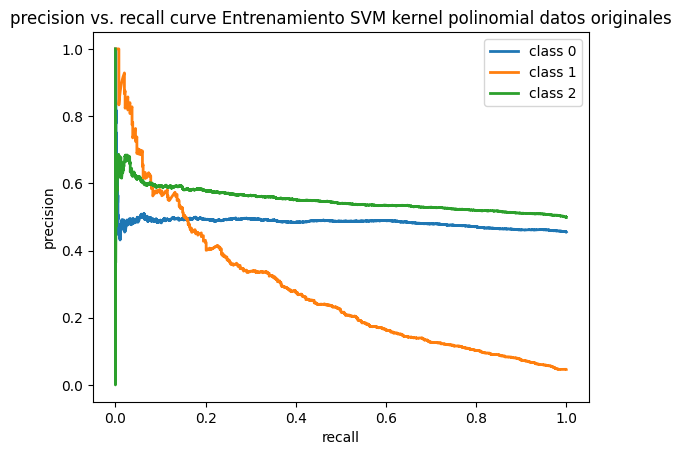

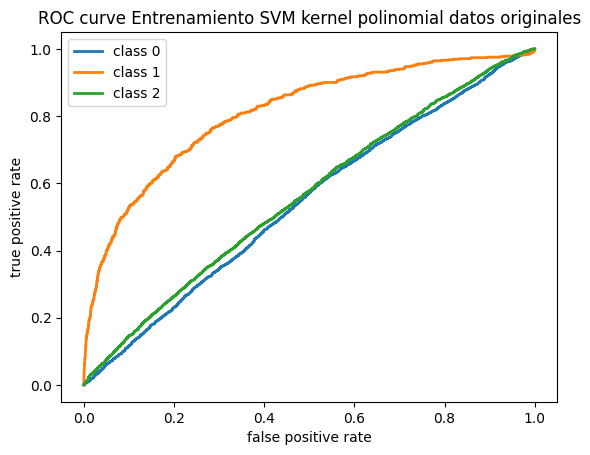

(0.502920227920228,
 0.4572415704714862,
 0.502920227920228,
 0.17804089218361954,
 0.5629826274863647,
 array([[ 333,    0, 6057],
        [ 135,    0,  516],
        [ 271,    0, 6728]], dtype=int64))

In [14]:
Yhat_poly_test = mod_poly.predict(X_test)
Yhat_poly_train = mod_poly.predict(X_train)
Yhat_poly_test_prob = mod_poly.predict_proba(X_test)
Yhat_poly_train_prob = mod_poly.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_poly_test, Yhat_poly_test_prob,3, "Prueba SVM kernel polinomial datos originales")
eval_perform_multi_class(Y_train,Yhat_poly_train, Yhat_poly_train_prob,3, "Entrenamiento SVM kernel polinomial datos originales")


Performance del modelo de Prueba SVM kernel rbf datos originales
 Accu 0.5104685942173479 
 Prec 0.511880935508408 
 Reca 0.5104685942173479 
 Matriz de confusión:
 [[1075    5 1637]
 [ 103   28  168]
 [1021   12 1969]]

Métricas de Probabilidad:
 Brier Score: 0.17920654719457083 
 AUC 0.5610


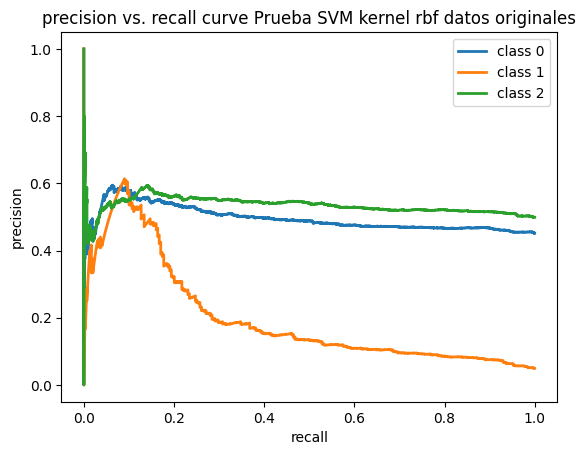

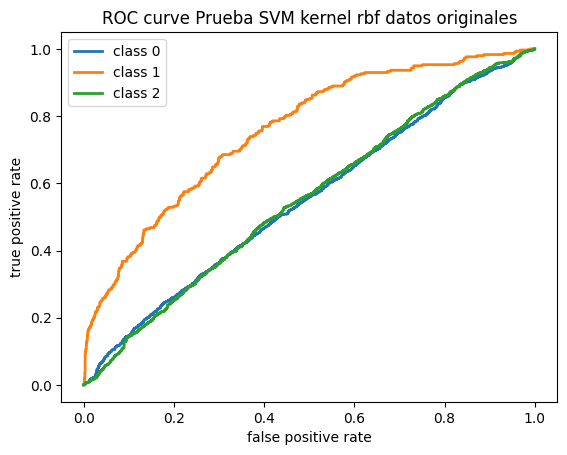


Performance del modelo de Entrenamiento SVM kernel rbf datos originales
 Accu 0.7908831908831909 
 Prec 0.7965869000565614 
 Reca 0.7908831908831909 
 Matriz de confusión:
 [[4742   11 1637]
 [ 149  315  187]
 [ 944    8 6047]]

Métricas de Probabilidad:
 Brier Score: 0.1521748327635252 
 AUC 0.8864


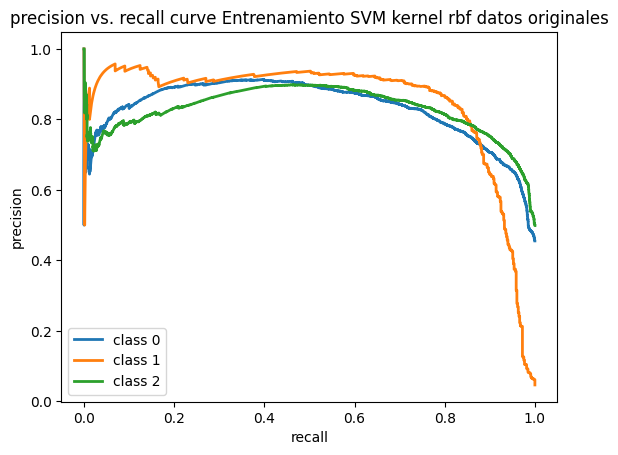

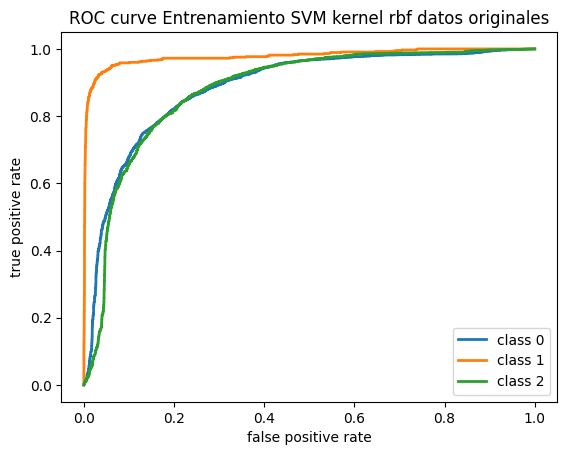

(0.7908831908831909,
 0.7965869000565614,
 0.7908831908831909,
 0.1521748327635252,
 0.8864034358843655,
 array([[4742,   11, 1637],
        [ 149,  315,  187],
        [ 944,    8, 6047]], dtype=int64))

In [15]:
Yhat_rbf_test = mod_rbf.predict(X_test)
Yhat_rbf_train = mod_rbf.predict(X_train)
Yhat_rbf_test_prob = mod_rbf.predict_proba(X_test)
Yhat_rbf_train_prob = mod_rbf.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_rbf_test, Yhat_rbf_test_prob,3,"Prueba SVM kernel rbf datos originales")
eval_perform_multi_class(Y_train,Yhat_rbf_train, Yhat_rbf_train_prob,3,"Entrenamiento SVM kernel rbf datos originales")

# Regresión logística

In [16]:
from sklearn.linear_model import LogisticRegression
# Comparacion con regresion logistica
# Usar regularización L1 (Lasso)
reg_log = LogisticRegression(penalty='l1', solver='liblinear', max_iter=2000)

In [17]:
reg_log.fit(X_train,Y_train)

LogisticRegression(max_iter=2000, penalty='l1', solver='liblinear')


Performance del modelo de Prueba regresión logística reg lasso datos originales
 Accu 0.4935194416749751 
 Prec 0.48139278363564236 
 Reca 0.4935194416749751 
 Matriz de confusión:
 [[ 717    4 1996]
 [ 156   15  128]
 [ 755    9 2238]]

Métricas de Probabilidad:
 Brier Score: 0.17984905165164242 
 AUC 0.5409


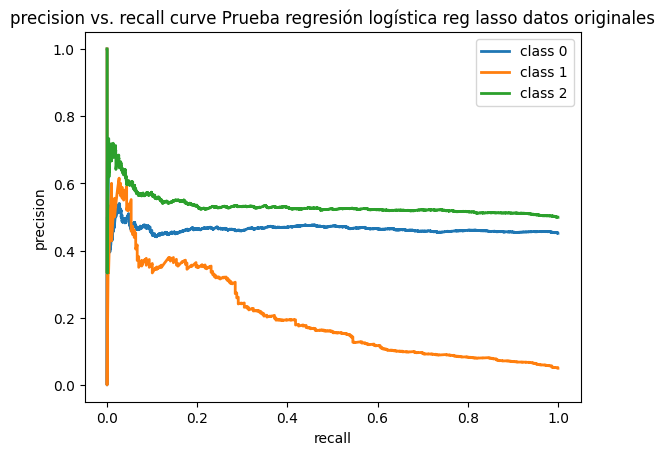

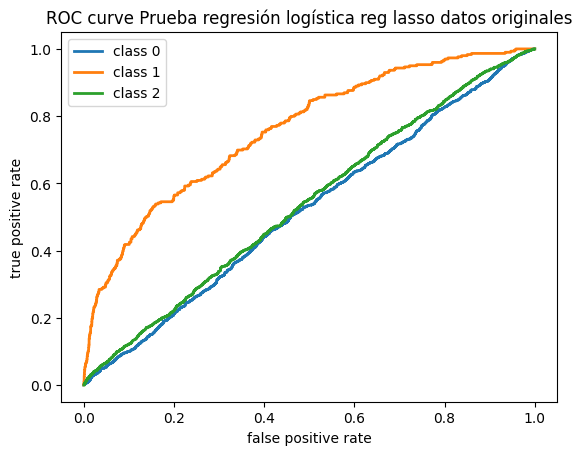


Performance del modelo de Entrenamiento regresión logística reg lasso datos originales
 Accu 0.5077635327635328 
 Prec 0.4975178880679721 
 Reca 0.5077635327635328 
 Matriz de confusión:
 [[1731   25 4634]
 [ 331   42  278]
 [1629   14 5356]]

Métricas de Probabilidad:
 Brier Score: 0.17766988219717347 
 AUC 0.5628


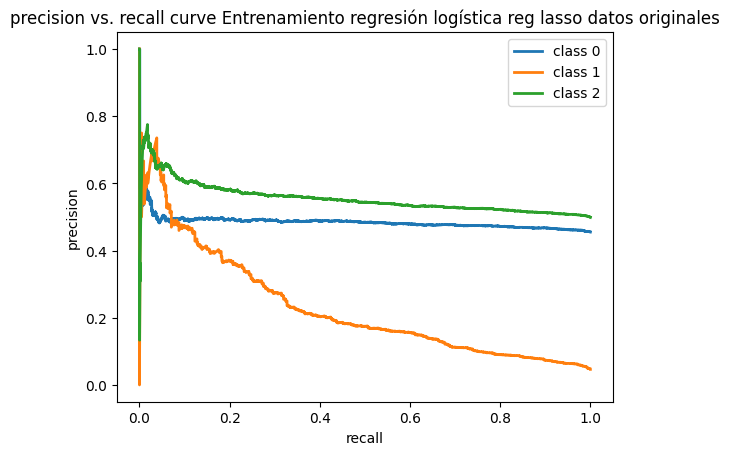

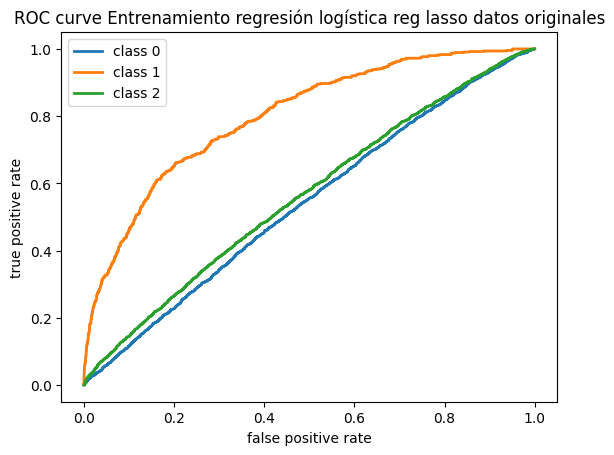

(0.5077635327635328,
 0.4975178880679721,
 0.5077635327635328,
 0.17766988219717347,
 0.5628399310706698,
 array([[1731,   25, 4634],
        [ 331,   42,  278],
        [1629,   14, 5356]], dtype=int64))

In [18]:
# Salida Y & "hat" (ŷ) que denota predicciones estimadas.
Yhat_log_test = reg_log.predict(X_test)
Yhat_log_train = reg_log.predict(X_train)
Yhat_log_test_proba = reg_log.predict_proba(X_test)
Yhat_log_train_proba = reg_log.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_log_test, Yhat_log_test_proba,3,"Prueba regresión logística reg lasso datos originales")
eval_perform_multi_class(Y_train,Yhat_log_train, Yhat_log_train_proba,3,"Entrenamiento regresión logística reg lasso datos originales")

# XGboost de ejemplo para comparar el performance (datos originales)

A pesar de no haber sido visto en clase, se utiliza para comparar este poderoso modelo con los ya presentados con la hipotesis de que se obtendrán mejores resultados.

In [19]:
import xgboost as xgb
# Crear un clasificador XGBoost
xgboost = xgb.XGBClassifier()

In [20]:
# Entrenar el modelo en los datos de entrenamiento
xgboost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)


Performance del modelo de Prueba Xgboost datos originales
 Accu 0.847457627118644 
 Prec 0.8360235833771761 
 Reca 0.847457627118644 
 Matriz de confusión:
 [[2394   23  300]
 [ 131   52  116]
 [ 318   30 2654]]

Métricas de Probabilidad:
 Brier Score: 0.08009954258980685 
 AUC 0.9297


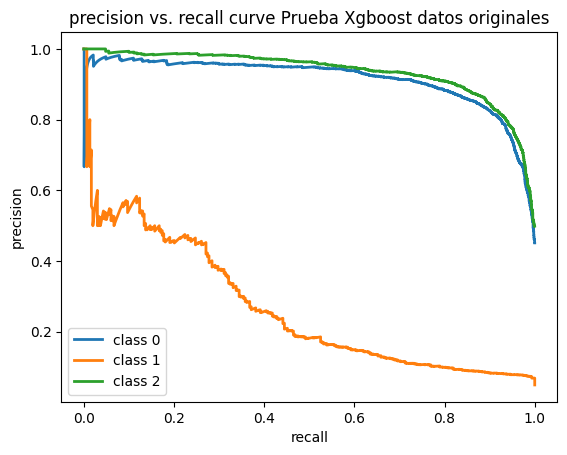

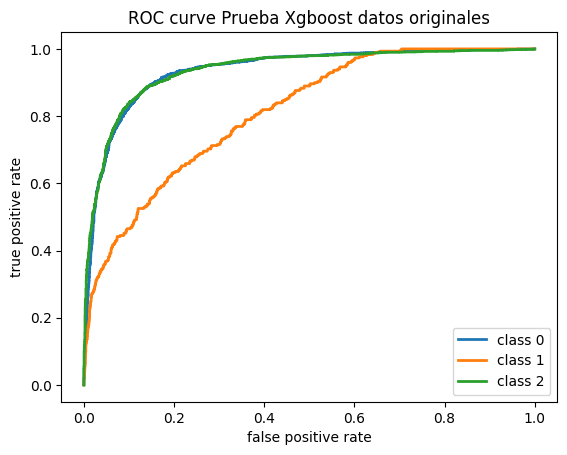


Performance del modelo de Entrenamiento Xgboost datos originales
 Accu 0.9274928774928775 
 Prec 0.9273735063068225 
 Reca 0.9274928774928775 
 Matriz de confusión:
 [[6031   13  346]
 [ 169  309  173]
 [ 304   13 6682]]

Métricas de Probabilidad:
 Brier Score: 0.04509362611133889 
 AUC 0.9868


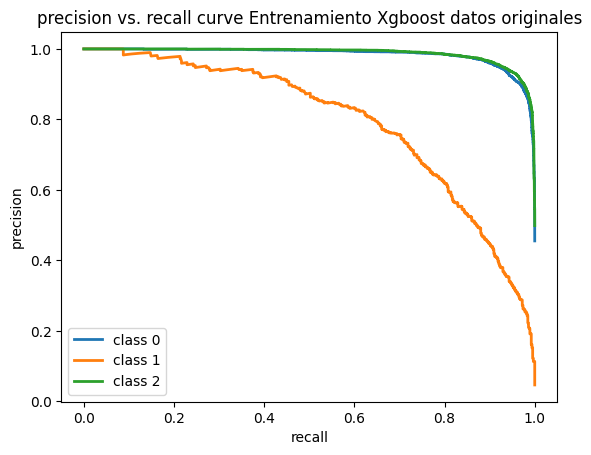

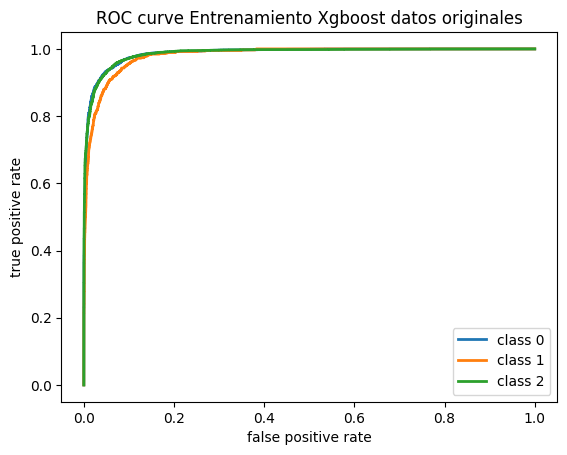

(0.9274928774928775,
 0.9273735063068225,
 0.9274928774928775,
 0.04509362611133889,
 0.9868163342888855,
 array([[6031,   13,  346],
        [ 169,  309,  173],
        [ 304,   13, 6682]], dtype=int64))

In [21]:
Yhat_xgboost_test = xgboost.predict(X_test)
Yhat_xgboost_train = xgboost.predict(X_train)
Yhat_xgboost_test_prob = xgboost.predict_proba(X_test)
Yhat_xgboost_train_prob = xgboost.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_xgboost_test, Yhat_xgboost_test_prob,3,"Prueba Xgboost datos originales")
eval_perform_multi_class(Y_train,Yhat_xgboost_train, Yhat_xgboost_train_prob,3,"Entrenamiento Xgboost datos originales")

In [22]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier()
lgbm.fit(X_train, Y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 353
[LightGBM] [Info] Number of data points in the train set: 14040, number of used features: 10
[LightGBM] [Info] Start training from score -0.787176
[LightGBM] [Info] Start training from score -3.071156
[LightGBM] [Info] Start training from score -0.696143


LGBMClassifier()


Performance del modelo de Prueba LightGBM datos reales
 Accu 0.8431372549019608 
 Prec 0.8313829780333215 
 Reca 0.8431372549019608 
 Matriz de confusión:
 [[2405   17  295]
 [ 125   41  133]
 [ 353   21 2628]]

Métricas de Probabilidad:
 Brier Score: 0.08673152487375546 
 AUC 0.9179


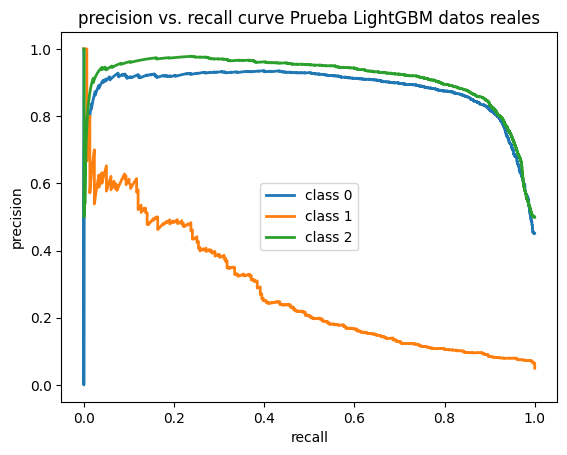

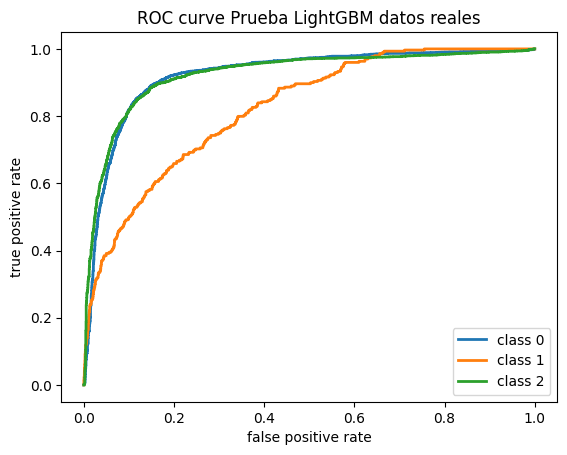


Performance del modelo de Entrenamiento LightGBM datos reales
 Accu 0.8835470085470085 
 Prec 0.8815659353669816 
 Reca 0.8835470085470085 
 Matriz de confusión:
 [[5799   26  565]
 [ 204  200  247]
 [ 574   19 6406]]

Métricas de Probabilidad:
 Brier Score: 0.06456110435611473 
 AUC 0.9676


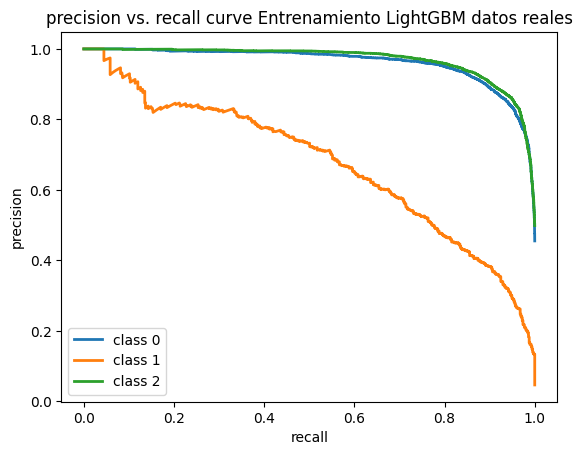

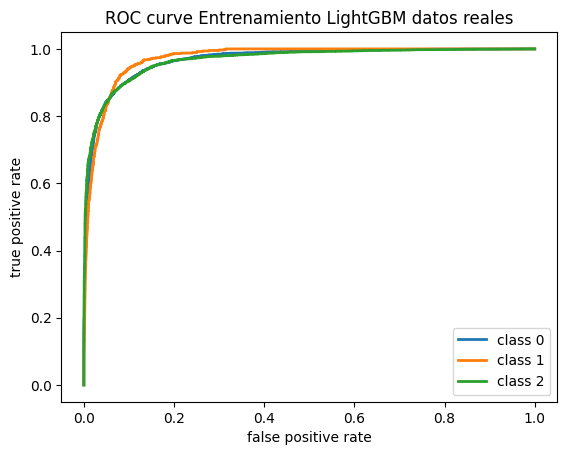

(0.8835470085470085,
 0.8815659353669816,
 0.8835470085470085,
 0.06456110435611473,
 0.9676035471150224,
 array([[5799,   26,  565],
        [ 204,  200,  247],
        [ 574,   19, 6406]], dtype=int64))

In [23]:
Yhat_lgbm_test = lgbm.predict(X_test)
Yhat_lgbm_train = lgbm.predict(X_train)
Yhat_lgbm_test_prob = lgbm.predict_proba(X_test)
Yhat_lgbm_train_prob = lgbm.predict_proba(X_train)
eval_perform_multi_class(Y_test,Yhat_lgbm_test,Yhat_lgbm_test_prob, 3, "Prueba LightGBM datos originales")
eval_perform_multi_class(Y_train,Yhat_lgbm_train,Yhat_lgbm_train_prob, 3 ,"Entrenamiento LightGBM datos originales")